# 第5章 Python数据分析与可视化
##  5.2 Python数据可视化


###  5. 其他类型的图表  
matplotlib.pyplot提供了丰富的绘图函数可供选择，除了已学过的plot（坐标图），还包括：
- 1）柱状图：plt.bar( )
- 2）条形图：plt.barh( )
- 3）直方图：plt.hist( )
- 4）散点图：plt.scatter( )
- 5）饼图：plt.pie( )

In [1]:
# %matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

**matplotlib使用rcParams配置来自定义图形的各种默认属性，称之为rc配置或rc参数。**  
- 通过rc参数可以修改默认的属性，包括窗体大小、每英寸的点数、线条宽度、颜色、样式、坐标轴、坐标和网络属性、文本、字体等。  
- rc参数存储在字典变量中，通过字典的方式进行访问。

In [43]:
# 中文字体设置
mpl.rcParams['font.sans-serif'] = "SimHei"
# 字体大小设置
mpl.rcParams["font.size"] = 16    #16pt
# 字体风格设置
mpl.rcParams["font.style"] = "italic"
# 配置坐标轴刻度值模式，显示负号
mpl.rcParams['axes.unicode_minus'] = False

#设置中文字体
fontCN = {
    "family":mpl.rcParams["font.family"],
    "style":mpl.rcParams["font.style"],
    "weight":"normal",
    "color":"green",
    "size": mpl.rcParams["font.size"]
}

####  柱状图
- 通常用来<font color='blue'>**绘制二维离散数据**</font>，以表示数据的大小和比较差异。
- 语法格式：<code><mark><font color=blue size=4>plt.bar(x, height, width=0.8, bottom=None, align='center', color……**kwargs)</font></mark></code>
     - 常用参数：
         * x：x 轴数据，一般是一组数据的类别。通常，每个分类与连续的各个整数对应，给 height在 x 轴上定位。
         * height：y 轴对应柱的高度。数据个数与 x 的数据个数相同。
         * width：x 轴对应柱的相对宽度（等分宽度中的占比 ），默认 0.8（保证柱与柱之间留有0.2的空隙）。
         * bottom：y 轴基准值，表示底部位置，默认为 0。
         * align：柱状图对齐方式，可取值为 'center' （以[x[i], x[i+1]]中点为位置）、 'edge' （以[x[i], x[i+1]]左边缘为位置）。
         


***step1 简单柱状图：表示单个数据系列的柱状图***

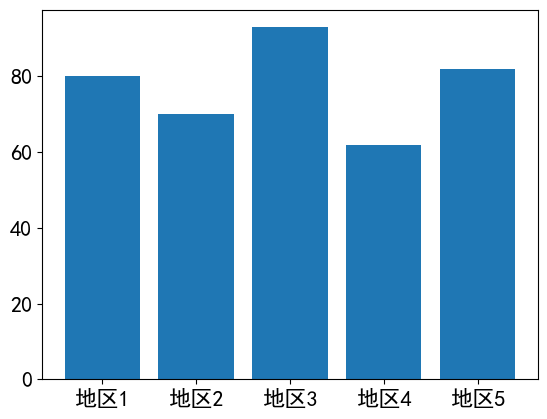

In [15]:
# 绘制柱状图

group_labels = ['地区1', '地区2', '地区3', '地区4', '地区5']
x_ticks = np.arange( len(group_labels) )  # x轴刻度位置
salesA = [80, 70, 93, 62, 82] #产品 A销售量

plt.bar(x_ticks, salesA) #最简生成方式
# plt.xticks(x_ticks,group_labels) #画刻度线、定义刻度线上的标签文字

width = 0.3 #柱子宽度 (等分宽度中的占比 ,所以一般不设置为1)
# plt.bar(x_ticks,salesA,width=width, align='edge', label='产品 A')

plt.show()  #显示图形

***step2 堆叠柱状图：将多个数据系列叠加在一起来显示它们的总和***

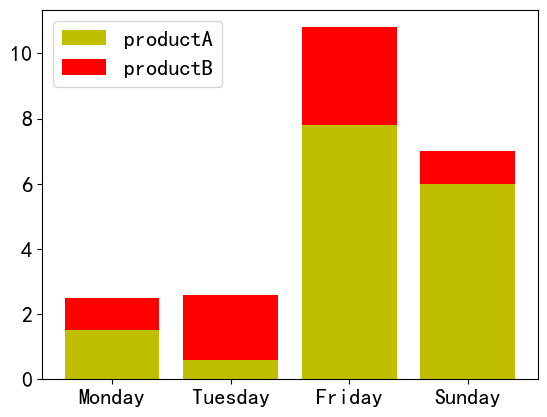

In [21]:
weekday_list = ['Monday','Tuesday','Friday','Sunday']
value_productA = [1.5, 0.6, 7.8, 6]  #产品 A销售额
value_productB = [1, 2, 3, 1]        #产品 A销售额
weekday_x = np.arange(len(value_productA))   # x轴刻度位置

plt.bar(weekday_x, value_productA, label='productA',fc = 'y')
plt.bar(weekday_x, value_productB, label='productB', bottom=value_productA, tick_label = weekday_list, facecolor = 'r') #bottom堆叠效果
# plt.bar(weekday_x+0.1, value_productB,  label='productB', tick_label = weekday_list, fc = 'r')  #分组柱状图

plt.legend()

plt.show()

***step3 并列柱状图：将多个数据系列并排放置，以便进行比较***

[0 1 2 3 4]


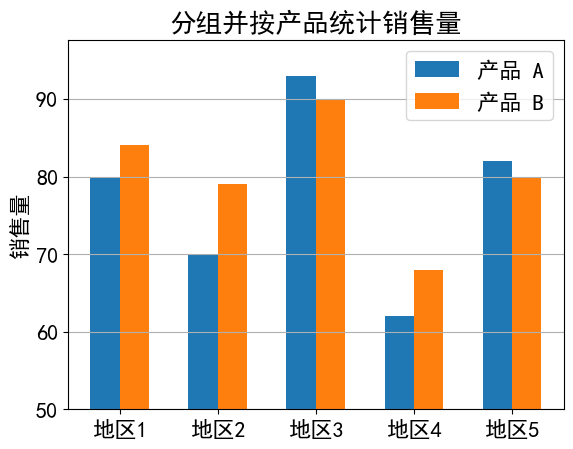

In [32]:
group_labels = ['地区1', '地区2', '地区3', '地区4', '地区5']
x_ticks = np.arange( len(group_labels) )  # x轴刻度位置 0 1 2 3 4
print(x_ticks)
salesA = [80, 70, 93, 62, 82] #产品 A销售量
salesB = [84, 79, 90, 68, 80] #产品 B销售量

width = 0.3 #柱子宽度 (等分宽度中的占比 ,所以一般不设置为1)

# 绘制柱状图
plt.bar(x_ticks - width/2 , salesA, width, label='产品 A')
plt.bar(x_ticks + width/2 , salesB, width, label='产品 B')

#画刻度线、定义刻度线上的标签文字
plt.xticks(x_ticks, group_labels) 

plt.grid(axis='y')   #在y轴添加网格线
plt.ylabel('销售量') #y轴标签
plt.title('分组并按产品统计销售量') #标题
plt.legend( ) #图例显示

#设定 y 轴上限 top，bottom为下限  
plt.ylim(bottom=50) #下限刻度bottom为50，这里的单位和y轴的坐标刻度是一致的。

plt.show()

***step4 条形图***  
在水平方向上绘制条形图。  
- 语法格式：   
     <code><mark><font color=blue size=4>plt.barh(y, width, height=0.8, left=None, *, align='center', color=None, edgecolor=None, linewidth=None, tick_label=None, **kwargs)</font></mark></code>
        - 主要参数：
            - y: 指定条形图的纵坐标值。通常是一个序列或数组。
            - width: 指定条形图的宽度。通常是一个标量或序列
            - height: 指定条形图的高度，默认为 0.8。通常是一个标量或序列
            - left: 指定条形图左边界的位置，默认为 None。
            - align: 指定条形图的对齐方式，默认为 'center'。
            - color: 指定条形图的填充颜色。
            - edgecolor: 指定条形图的边框颜色。
            - linewidth: 指定条形图边框线宽度。
            - tick_label: 指定条形图的刻度标签。
            - **kwargs: 其他关键字参数。

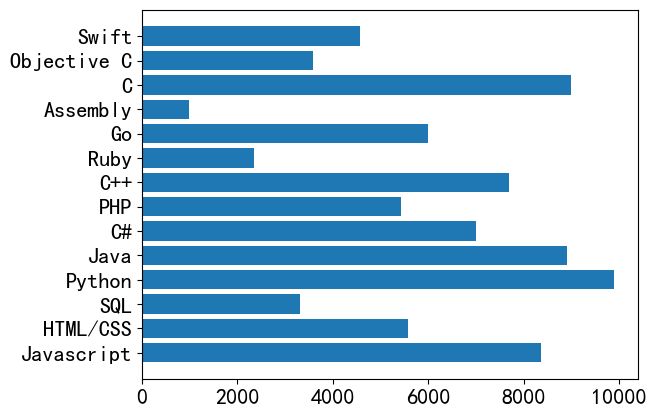

In [36]:
# 绘制水平方向柱状图
language = ["Javascript", "HTML/CSS", "SQL", "Python", "Java", "C#", "PHP", 
            "C++", "Ruby", "Go", "Assembly", "C", "Objective C", "Swift"]
factor = [8351, 5566, 3321, 9898, 8900, 7000, 5432, 7700, 2345, 5990, 980, 9000, 3579, 4567]

# 绘制水平柱状图
plt.barh(language, factor)

plt.show()

####  直方图
- 直方图（Bar），形状类似柱状图却有着与柱状图完全不同的含义。
- <font color='blue'>直方图是统计学概念，将数据值所在的范围分成若干个区间，然后统计**每个区间内数据元的数量**。</font>（强调的是一种分布）。
        在平面直角坐标系中，横轴标出每个组的端点，纵轴表示频数，每个矩形的高代表对应的频数。　　
        这样的统计图称为频数分布直方图，既能保持分布状态不变，又能直观地看出每个分组的数量（频数）。
---
- 语法格式：<code><mark><font color=blue size=4>plt.hist(x, bins=None, range=None, histtype='bar', label=None, ……**kwargs)</font></mark></code>  
    - 常用参数：
            - x：指定要绘制直方图的数据。
            - bins：指定直方图条形的个数，默认 10。或序列表示的个区域边界。
            - range：指定直方图数据的上下界，超出范围的将被忽略。默认包含绘图数据的最大值和最小值。
            - histtype：画图的形状。'bar', 'barstacked', 'step', 'stepfilled'。默认为 "bar"。
            - rwidth:每个柱子的宽度，如果为1，就没有边界了
    - 返回值：一个三个元素的元组，三个元素分别为：
            - n：直方图统计结果的数组，即每个区间内的数据个数。
            - bins：每个区间的边界值。个数为 n 的个数+1。
            - patches：绘制直方图的矩形对象。

**step1 绘制一般直方图**

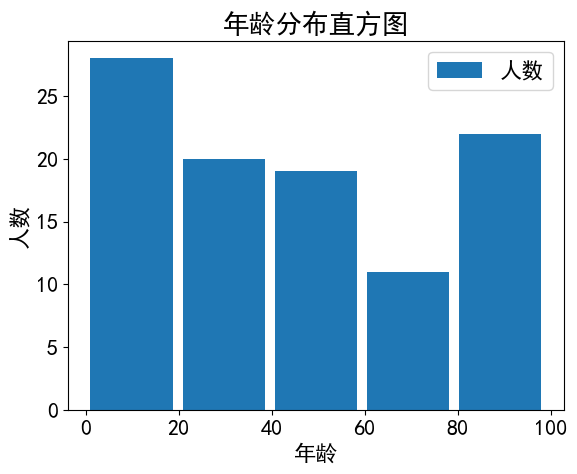

[65 59 89  2 15 48 93 42 25 49  6 29 36 39  4  3 28 97 72 24 92 80 99 16
 44 75  6 54 21  5 57 68 80 63 19 77 15 96 22 26 16 17 28 26 28 31 51 26
 87 65 49 27 26 54 98 38 74 44 90  5 52 58 80 86 11 19  5  6 49  4 81 13
 46  5 78 92  1 55 97  9 45 93  9 58 67 26 82 85 32  0 85 98  7 31  5 61
  6 59 19 98]


In [58]:
Age = np.random.randint(0,100,100)                #获得随机分布的随机整数

#直方图，将所有数据分成 5个区段
# n,bins,patches = plt.hist(Age, bins=5, label='人数')
n,bins,patches = plt.hist(Age, bins=5, label='人数', rwidth=0.9)  #尝试修改rwidth=1,默认也是1
# print(n,bins,patches)

plt.title('年龄分布直方图')
plt.xlabel('年龄')
plt.ylabel('人数')
plt.legend()
# plt.tight_layout() #自动调整图形的子图布局，能够解决子图重叠和标签重叠等问题

plt.show()
print(Age)

#### 散点图 & 气泡图
* 散点图：通常研究<font color='blue'>两组变量之间数据的相互关系</font>。
        - 从散点图可以简单判断两个变量是否有相关关系、相关关系的强弱、是正相关还是负相关、相关的趋势如何等等。
* 气泡图：通常用于展示<font color='blue'>三个变量之间的关系</font>。
        - 与散点图类似，绘制时将一个变量放在横轴，另一个变量放在纵轴，而第三个变量则用气泡的大小来表示。
* 注意：散点图，气泡图所有的参数一致。
---
- 语法格式：<code><mark><font color=blue size=4>plt.scatter(x,y,s=None, c=None, marker=None, alpha=None, linewidths=None,edgecolors=None)</font></mark></code>  
        - 参数说明：
            * x，y 表示散点的坐标。是相同长度的数组。
            * s 散点的大小，屏幕像素单位。
            * c 散点的颜色，默认蓝色。
            * alpha 透明度。实数，0-1之间；0表示完全透明，1则表示完全不透明。
            * makers 标记样式，默认的是'o'。
            * linewidths 散点外轮廓的线宽。
            * edgecolors 散点外轮廓的颜色。

In [60]:
# 读取 excel 文件
df_House = pd.read_excel('house_top50.xlsx')
df_House

,title,housetype,floor,orientation,yearbuilt,Street,地址,房主,建筑面积_平方米,总价格_万,unitprice,first
0,D铁口 万达大明宫 龙湖枫香庭 精装大3室 南北通透 实图诚心急售,3室2厅,高层(共28层),南北向,2012,龙湖枫香庭,北大明宫-大明宫国家遗址公园东侧,解**,118,230,-19492,优质教育
1,为你而选为你为家 华远君城 2室2厅 88平,2室2厅,高层(共32层),西北向,2011,华远君城,北大明宫-二环北路东段395号,吴*,88,141,-15988,优质教育
2,大明宫东侧 太元路上 品质较高 人车分流 绿化好 视野开阔,2室2厅,低层(共33层),南向,2017,中海开元壹号,北大明宫-大明宫国家遗址公园东侧,李**,74,155,-21074,满二
3,北大明宫 中海开元壹号 小高层1梯2户带车位毛坯 前后无遮挡!,5室2厅,中层(共11层),南北向,2014,中海开元壹号,北大明宫-太华北路199号,王**,175,350,-20000,满五唯一/满二
4,"中海开元壹号二期,三室138平仅售可按揭房仅216万",3室2厅,中层(共33层),南北向,2014,中海开元壹号,北大明宫-太华北路199号,解**,138,216,-15652,NaN
5,二环内 龙湖物业龙湖枫香庭万达旁 两室豪装 急售满五,2室2厅,中层(共32层),南向,2014,龙湖枫香庭,北大明宫-太华北路与北二环交汇处向北300米路东,凌**,80,175,-21875,NaN
6,华远两室 西南向 87平 140万,2室2厅,中层(共32层),西南向,2010,华远君城,北大明宫-大明宫国家遗址公园东侧,刘*,87,140,-16092,优质教育
7,"西瑞北国之春,,小高层一梯两户,南北通透",3室2厅,中层(共11层),南北向,2008,西瑞北国之春,北大明宫-二环北路东段396号,李*,150,160,10667,满五唯一/满二
8,买房带车位 华远君城 137平精装三房 诚意急售 价位可商议,3室2厅,中层(共30层),南北向,2013,华远君城,北大明宫-大明宫国家遗址公园东侧,张**,137,260,18978,优质教育
9,金源园林 经典两室 中间楼层 全明户型 一把付85万,2室2厅,高层(共32层),南向,2050,金源皇家园林,北大明宫-凤城一路东段(贞观路119号),南*,84,85,10119,NaN


**step1 绘制散点图**

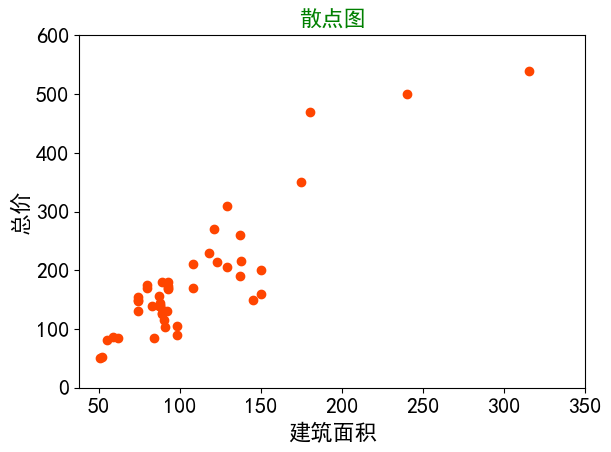

In [88]:
# 房屋价格和面积的关系
figScatter = plt.figure()
scatter_x = df_House["建筑面积_平方米"] 
scatter_y = df_House["总价格_万"] 

# plt.scatter(x, y, s=area, c=colors, linewidths=widths, alpha=0.5, marker='o')
plt.scatter(scatter_x, scatter_y, c="orangered")

# plt级别的字体设置，优先级高于mpl,所以如果不设置，会自动继承mpl的设置
plt.title("散点图", fontdict=fontCN)  
plt.xlabel("建筑面积")
plt.ylabel("总价")

# 设置坐标轴的刻度
plt.xticks(np.arange(50,400,50))
plt.yticks(np.arange(0,700,100))
plt.tight_layout()

plt.show()
# plt.savefig(titleForStep11+".png",dpi=300)

**step2 绘制气泡图**

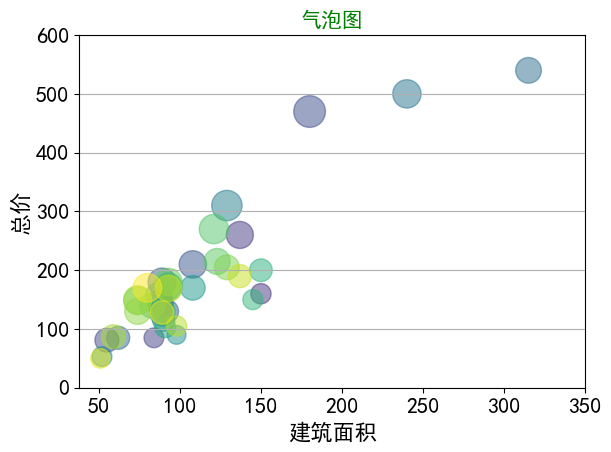

In [66]:
# 房屋总价、面积和单价

scatter_z = df_House["unitprice"] #每平米价格

color=np.arange(len(scatter_x))
area = scatter_z * 0.02          #核心，点的大小会反映每平米价格的大小
plt.scatter(scatter_x, scatter_y, s=area, alpha=0.5, c=color)

plt.title("气泡图", fontsize=15, fontdict=fontCN)
plt.xlabel("建筑面积")
plt.ylabel("总价")
plt.xticks(np.arange(50,400,50))
plt.yticks(np.arange(0,700,100))
plt.grid(True, axis="y")
plt.tight_layout()

plt.show()
# plt.savefig(titleForStep12+".png",dpi=300)

#### 饼图
- 语法格式：  
        plt.pie(x, explode=None, labels=None, colors=None, autopct=None, 
                pctdistance=0.6, shadow=False, labeldistance=1.1, 
                startangle=None, radius=None, counterclock=True,……)

    - 常用参数：
            * x：饼图的数值，必须为数组形式。除了 x 参数之外，其他参数都是可选的。
            * explode：每个扇形距离圆心的偏移量，用于突出显示某个扇区，默认为 None。需为长度与 x 相同的数组，以相对于半径的比例来指定。
            * labels：每块扇形外侧显示的说明文字（数据标签）。
            * colors：每块扇形的默认颜色=(‘b’, ‘g’, ‘r’, ‘c’, ‘m’, ‘y’, ‘k’, ‘w’)。
            * autopct：设置饼图内显示的百分比格式,可以使用格式化字符串。
            * pctdistance：指定百分比标签与圆心的距离，默认为 0.6。
            * shadow：是否在饼图下面添加阴影效果。默认值为 False，即不画阴影。
            * labeldistance：label 标签的绘制位置，类似于 pctdistance，相对于半径的比例，默认值为1.1, 如<1则绘制在饼图内侧。
            * startangle：第一个扇形的起始绘制角度，默认是从x轴正方向逆时针画起。
            

**step1 matplotlib绘制饼图**

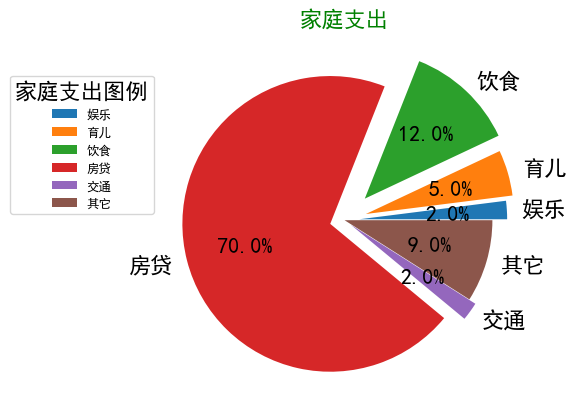

In [109]:
''' 
bbox_to_anchor=(x,y)表示legend或colorbar相对于默认位置，左侧边框向右移动了x倍AxesSubplot的宽度，向上移动了y倍AxesSubplot的高度。
'''

#标签文字
family_labels = ['娱乐','育儿','饮食','房贷','交通','其它']
family_value = [2, 5, 12, 70, 2, 9] #各个值 (最重要的数据 )

#炸离中心距离
explode = [0.1, 0.15, 0.2, 0.1, 0.05, 0.0]
plt.pie(family_value,
    explode=explode, # 不炸离，可以是设置explode为0，或者删除该行,
    labels=family_labels, 
    autopct='%.1f%%'      #显示的百分比格式
) 

plt.title("家庭支出",fontdict=fontCN)
plt.legend(family_labels
           , title='家庭支出图例'
           , fontsize=9
           , loc='lower right'  #右下角
           , bbox_to_anchor= (0,0.5) #图例的右下角坐标占比：将legend的左侧边框放置在AxesSubplot的左端，纵坐标方向上向上移动一半的AxesSubplot高度
)

plt.show()

1. 在matplotlib中，plt.legend()方法的loc参数用于设置图例的位置。常用的loc参数取值如下：

- 'best'：自动选择最佳位置（默认值）
- 'upper right'：右上角
- 'upper left'：左上角
- 'lower left'：左下角
- 'lower right'：右下角
- 'right'：右侧
- 'center left'：左侧居中
- 'center right'：右侧居中
- 'lower center'：底部居中
- 'upper center'：顶部居中
- 'center'：正中间  

2. bbox_to_anchor参数是用来进一步微调图例的具体位置，通常和loc参数一起使用，两者结合使用可以实现更为灵活的图例布局。

        接受一个坐标元组(x, y)表示图例相对的坐标位置，在图中分别表示横坐标和纵坐标的比例位置。
            当x=0时，图例位于左边界，x=1时，图例位于右边界。
            当y=0时，图例位于底部边界，y=1时，图例位于顶部边界。 

#### 教材例题：图表综合

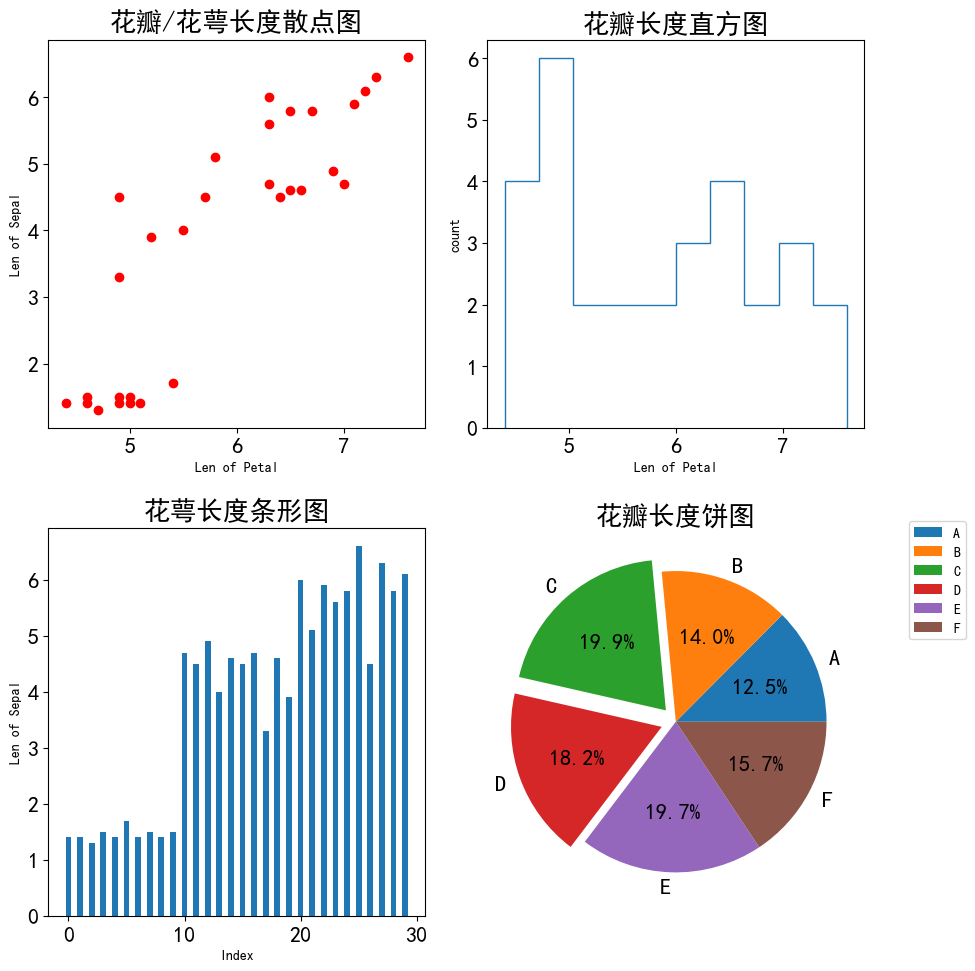

In [124]:

# 【例5-38】绘制鸢尾花数据集的特征分布图。

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#===========准备数据=============
data = pd.read_csv('iris.txt', header=None)   #读取鸢尾花数据文件
df = pd.DataFrame(data)                     #转化为dataframe数据类型
df.columns = ['LenPetal','LenSepal']           #花瓣长度，花萼长度两个特征

#===========全局变量=============
plt.rcParams['font.sans-serif']=['SimHei']       #显示中文 

#===========图表1=============
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.xlabel("Len of Petal", fontsize=10)        #横轴标签
plt.ylabel("Len of Sepal", fontsize=10)        #纵轴标签
plt.title("花瓣/花萼长度散点图")            #图表标题
plt.scatter(df['LenPetal'],df['LenSepal'],c='red')  #绘制两个特征组合的数据点

#===========图表2=============
plt.subplot(2,2,2)
plt.title("花瓣长度直方图")
plt.xlabel("Len of Petal", fontsize=10)        #横轴标签
plt.ylabel("count", fontsize=10)             #纵轴标签
# histtype ='step' 则是指定直方图类型为折线图（step）。可选参数还有'bar', 'barstacked', 'step', 'stepfilled'等
plt.hist(df['LenPetal'],histtype ='step')        #绘制花瓣长度分布直方图

#===========图表3=============
x = np.arange(30)
plt.subplot(2,2,3)
plt.xlabel("Index", fontsize=10)            #横轴标签
plt.ylabel("Len of Sepal", fontsize=10)      #横轴标签
plt.title("花萼长度条形图")
plt.bar(x, height=df['LenSepal'], width=0.5)   #绘制花萼数据条形图

#===========图表4=============
plt.subplot(2,2,4)
# sizes = [2,5,12,70,2,9]
explode = (0,0,0.1,0.1,0,0)
labels = ['A','B','C','D','E','F']
plt.title("花瓣长度饼图")
plt.pie(df['LenPetal'][8:14], explode=explode, autopct='%1.1f%%', labels=labels)  #饼图
plt.legend(loc="upper left",fontsize=10,bbox_to_anchor=(1.1,1.05))
plt.tight_layout()

plt.show()

---
**以下教材例题（※选学）**

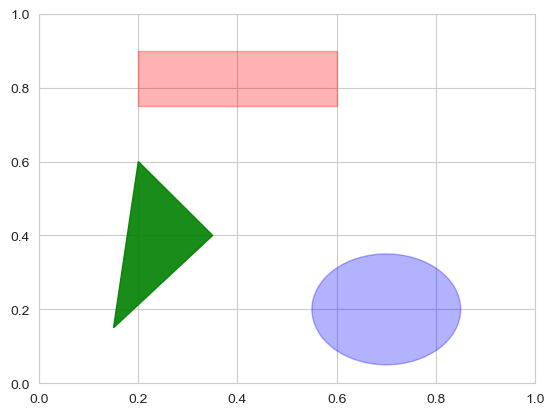

In [102]:
# 【例5-34】在subplot上绘制图形。（※）
# ax.add_patch ：在轴对象（axes）中添加图形（patch）的方法。
# 图形(patch)指的是包含各种形状（如矩形、圆形、多边形等）的类，用来表示二维几何图形。
# 创建一个圆形时，通常需要创建一个Patch对象（例如Circle对象）来表示，并使用ax.add_patch()方法将这个Patch对象添加到Axes对象中。

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
rect=plt.Rectangle((0.2,0.75),0.4,0.15,color='r',alpha=0.3)
circ=plt.Circle((0.7,0.2),0.15,color='b',alpha=0.3)
pgon=plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='g',alpha=0.9)
ax.add_patch(rect)  
ax.add_patch(circ)
ax.add_patch(pgon)
plt.show()


###  6. Pandas内嵌的绘图函数（※选学）

C:\Users\cai\AppData\Local\Temp\ipykernel_6196\2732969920.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv('plotdata2.txt',' ',header=None)


Text(0, 0.5, 'Number of users(Million)')

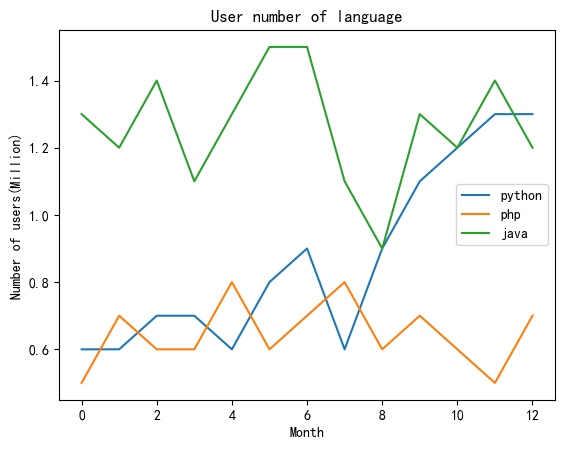

In [14]:
# 【例5-39】使用plotdata2.txt中的数据，绘制编程语言发展趋势图。  （✳）
import pandas as pd
data = pd.read_csv('plotdata2.txt',' ',header=None)
df=pd.DataFrame(data)
df.columns=(['python','php','java'])
ax=df.plot(title='User number of language')
ax.set_xlabel('Month')                     #设置x轴标签
ax.set_ylabel('Number of users(Million)')  #设置y轴标签


Text(0, 0.5, 'value')

C:\Users\cai\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\cai\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


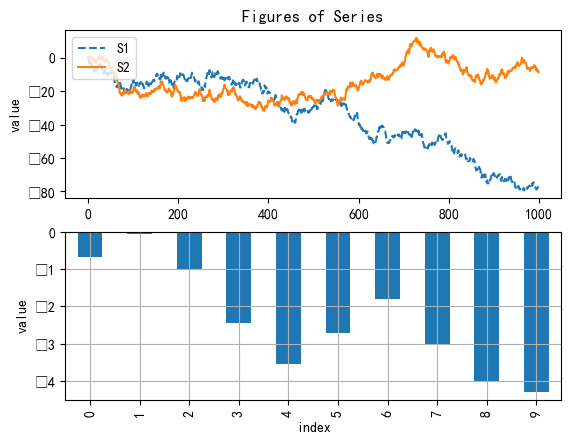

In [25]:
# 例5-40】为Series数据绘制图表。（✳）
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

# cumsum()函数累加数据
s1 = Series(np.random.randn(1000)).cumsum()
s2 = Series(np.random.randn(1000)).cumsum()

plt.subplot(211)    #第一个子图
# kind参数修改图类型
ax1=s1.plot(kind='line',label='S1',title='Figures of Series', style='--')
# 绘制第二个Series
s2.plot(ax=ax1,kind='line',label='S2')
plt.ylabel('value')
plt.legend(loc=2)  #right left

plt.subplot(212)   #第二个子图
s1[0:10].plot(kind='bar',grid=True,label='S1')
plt.xlabel('index')
plt.ylabel('value')


##  5.2.2 Seaborn模块（※选学）

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


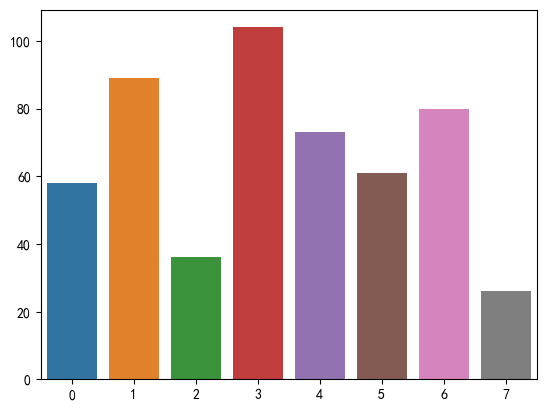

In [98]:
#【例5-41】绘制默认颜色的条形图。（✳）

%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(8)
y = np.array([58,89,36,104,73,61,80,26])

sns.barplot(x,y)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


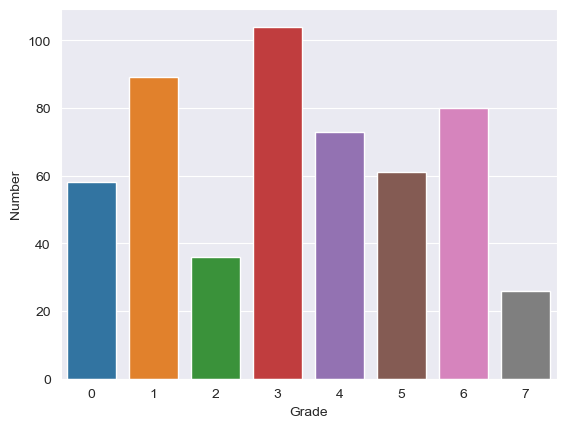

In [99]:
# 设置图表的主题（✳）

%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.arange(8)
y = np.array([58,89,36,104,73,61,80,26])

df = pd.DataFrame({"Grade": x,"Number": y})
sns.set_style('darkgrid')
sns.barplot("Grade","Number",data=df)
plt.show()

评分	人数：
4    108
3     71
5     65
2     38
1     18
Name: score, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


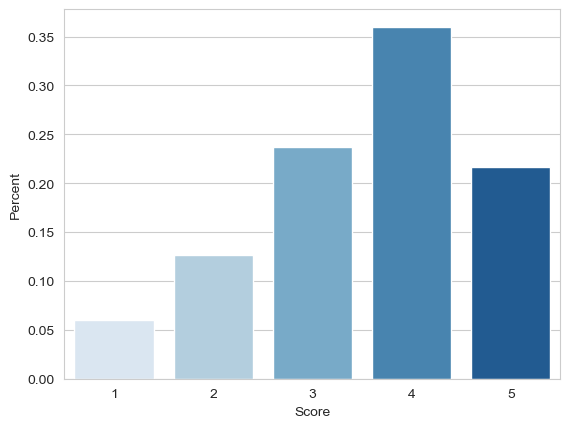

In [100]:
#【例5-42】使用条形图显示各电影评分对应的观众数量。（✳）
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
f = open('score.txt',encoding='UTF-8')
data = pd.read_csv(f,sep='\t',header=None,names=['Index','uNo','uAge','uOccup','filmNo','filmName','url','score','timestamp'])
#评分比例
rate = data['score'].value_counts()
print('评分\t人数：')
print(rate)
sns.set_style("whitegrid")
x=rate.index
y=rate.values/sum(rate)
data1=pd.DataFrame({'Score':x,'Percent':y})
bar_plot = sns.barplot('Score','Percent',data=data1,palette="Blues")
plt.show()
